In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np 
import pandas as pd
from sklearn.datasets import make_classification


In [3]:
X,y = make_classification(n_features=5,n_redundant=0,n_informative=5,n_clusters_per_class=1)

In [4]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,2.023931,0.530850,-1.181630,-0.716128,-0.029976,1
1,-1.188368,0.818809,-0.368910,-2.997412,2.418412,1
2,0.783832,-0.186885,-0.881831,-0.682529,0.578598,1
3,2.804045,-0.496226,0.071111,2.916805,0.844249,0
4,0.899663,1.108769,-0.633197,-1.735551,1.033216,1


In [5]:
# function for row sampling

def sample_rows(df,percent):
    return df.sample(int(percent*df.shape[0]),replace=True)

In [6]:
# function for feature sampling

import numpy as np
import pandas as pd

def sample_features(df, percent):
    # Exclude the target column from feature sampling
    feature_cols = [col for col in df.columns if col != 'target']
    
    # Calculate the number of feature columns to sample
    num_cols_to_sample = int(percent * len(feature_cols))
    
    # Randomly sample feature columns
    sampled_cols = np.random.choice(feature_cols, size=num_cols_to_sample, replace=False)
    
    # Create a new DataFrame with the sampled columns and the target column
    new_df = df[list(sampled_cols) + ['target']]
    return new_df


In [7]:
# function for combined sampling

def combined_sampling(df,row_percent,col_percent):
    new_df = sample_rows(df,row_percent)
    return sample_features(new_df,col_percent)

In [8]:
df1 = sample_rows(df,0.2)

In [9]:
df2 = sample_rows(df,0.2)

In [10]:
df3 = sample_rows(df,0.2)

In [11]:
from sklearn.tree import DecisionTreeClassifier

clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [12]:
clf1.fit(df1.iloc[:,0:5],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:5],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:5],df3.iloc[:,-1])

DecisionTreeClassifier()

In [13]:
from sklearn.tree import plot_tree

[Text(0.6, 0.8333333333333334, 'x[1] <= 0.341\ngini = 0.495\nsamples = 20\nvalue = [11, 9]'),
 Text(0.4, 0.5, 'x[3] <= -2.194\ngini = 0.26\nsamples = 13\nvalue = [11, 2]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]')]

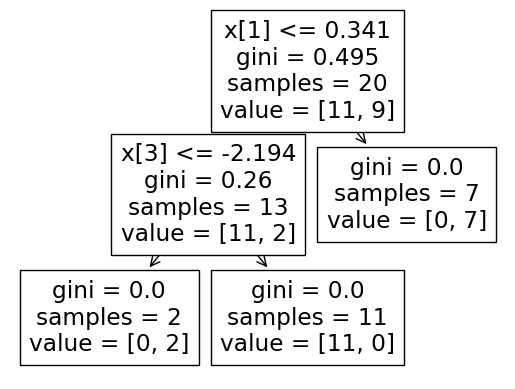

In [14]:
plot_tree(clf1)

[Text(0.6666666666666666, 0.875, 'x[1] <= 0.069\ngini = 0.495\nsamples = 20\nvalue = [9, 11]'),
 Text(0.5, 0.625, 'x[1] <= -1.335\ngini = 0.298\nsamples = 11\nvalue = [9, 2]'),
 Text(0.3333333333333333, 0.375, 'x[4] <= 0.586\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]')]

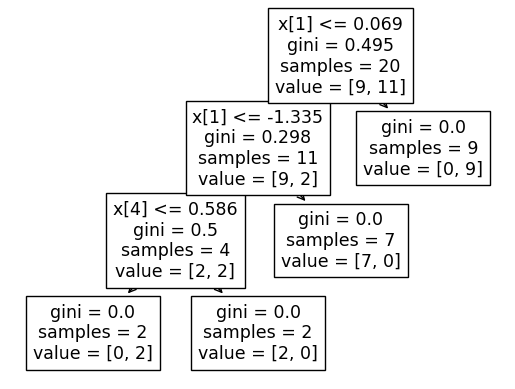

In [15]:
plot_tree(clf2)

[Text(0.3333333333333333, 0.875, 'x[3] <= -1.445\ngini = 0.42\nsamples = 20\nvalue = [14, 6]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.5, 0.625, 'x[1] <= -0.861\ngini = 0.124\nsamples = 15\nvalue = [14, 1]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(0.6666666666666666, 0.375, 'x[0] <= 1.504\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]')]

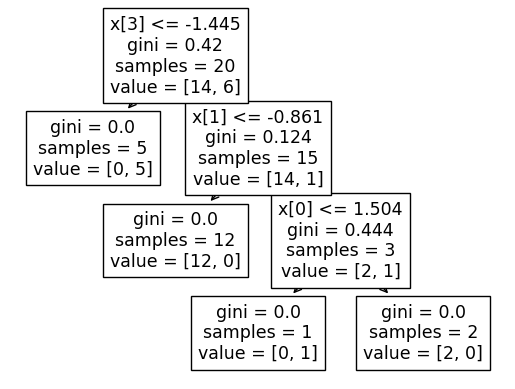

In [16]:
plot_tree(clf3)

In [17]:
clf1.predict(np.array([-0.070599,0.410071,-1.708002,-1.329855,-0.870380]).reshape(1,5))

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [18]:
clf2.predict(np.array([-0.070599,0.410071,-1.708002,-1.329855,-0.870380]).reshape(1,5))

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [19]:
clf3.predict(np.array([-0.070599,0.410071,-1.708002,-1.329855,-0.870380]).reshape(1,5))

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [20]:
sample_features(df,0.5)

,col3,col1,target
0,-1.181630,2.023931,1
1,-0.368910,-1.188368,1
2,-0.881831,0.783832,1
3,0.071111,2.804045,0
4,-0.633197,0.899663,1
...,...,...,...
95,-2.530939,5.247863,1
96,1.493443,2.373642,0
97,0.298381,-0.143868,1
98,-1.070169,2.391089,1


In [21]:
df4 = sample_features(df,0.8)
df5 = sample_features(df,0.8)
df6 = sample_features(df,0.8)

In [22]:
df4

,col4,col5,col2,col3,target
0,-0.716128,-0.029976,0.530850,-1.181630,1
1,-2.997412,2.418412,0.818809,-0.368910,1
2,-0.682529,0.578598,-0.186885,-0.881831,1
3,2.916805,0.844249,-0.496226,0.071111,0
4,-1.735551,1.033216,1.108769,-0.633197,1
...,...,...,...,...,...
95,1.127901,-0.641771,2.129605,-2.530939,1
96,-0.429544,-0.299731,1.623023,1.493443,0
97,-1.279012,0.452001,0.387344,0.298381,1
98,-1.196618,1.375546,3.006017,-1.070169,1


In [23]:
clf4 = DecisionTreeClassifier()
clf5 = DecisionTreeClassifier()
clf6 = DecisionTreeClassifier()

In [24]:
clf4.fit(df4.iloc[:,0:4],df4.iloc[:,-1])
clf5.fit(df5.iloc[:,0:4],df5.iloc[:,-1])
clf6.fit(df6.iloc[:,0:4],df6.iloc[:,-1])

DecisionTreeClassifier()

[Text(0.6710526315789473, 0.9375, 'x[2] <= 0.069\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.4473684210526316, 0.8125, 'x[2] <= -0.464\ngini = 0.32\nsamples = 60\nvalue = [48, 12]'),
 Text(0.2631578947368421, 0.6875, 'x[0] <= -1.96\ngini = 0.198\nsamples = 45\nvalue = [40, 5]'),
 Text(0.15789473684210525, 0.5625, 'x[1] <= 1.562\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(0.10526315789473684, 0.4375, 'x[3] <= -1.416\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.05263157894736842, 0.3125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.15789473684210525, 0.3125, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.21052631578947367, 0.4375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.3684210526315789, 0.5625, 'x[1] <= 0.82\ngini = 0.097\nsamples = 39\nvalue = [37, 2]'),
 Text(0.3157894736842105, 0.4375, 'x[3] <= -1.122\ngini = 0.298\nsamples = 11\nvalue = [9, 2]'),
 Text(0.2631578947368421, 0.3125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.3

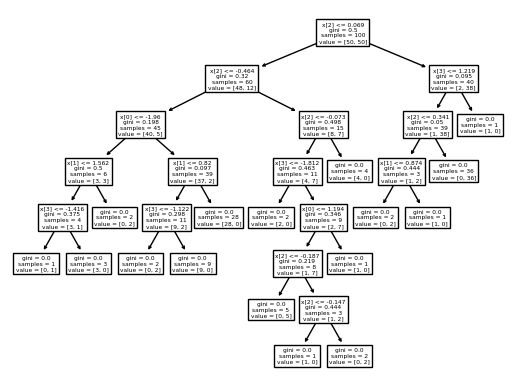

In [25]:
plot_tree(clf4)

[Text(0.5735294117647058, 0.9375, 'x[0] <= 0.069\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.2647058823529412, 0.8125, 'x[1] <= -0.711\ngini = 0.32\nsamples = 60\nvalue = [48, 12]'),
 Text(0.11764705882352941, 0.6875, 'x[3] <= -0.079\ngini = 0.444\nsamples = 9\nvalue = [3, 6]'),
 Text(0.058823529411764705, 0.5625, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.17647058823529413, 0.5625, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.4117647058823529, 0.6875, 'x[3] <= 0.104\ngini = 0.208\nsamples = 51\nvalue = [45, 6]'),
 Text(0.29411764705882354, 0.5625, 'x[2] <= -0.372\ngini = 0.49\nsamples = 7\nvalue = [3, 4]'),
 Text(0.23529411764705882, 0.4375, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.35294117647058826, 0.4375, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.5294117647058824, 0.5625, 'x[3] <= 0.815\ngini = 0.087\nsamples = 44\nvalue = [42, 2]'),
 Text(0.47058823529411764, 0.4375, 'x[1] <= 1.311\ngini = 0.32\nsamples = 10\nvalue = [8, 2]'),
 Text

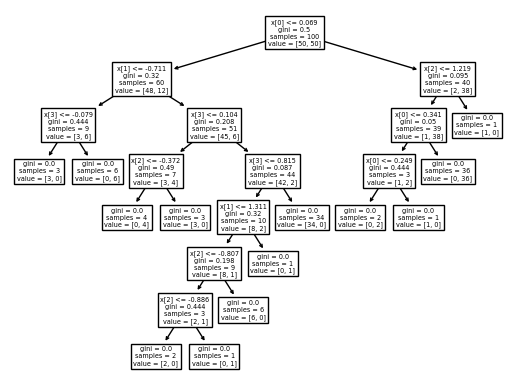

In [26]:
plot_tree(clf5)

[Text(0.5735294117647058, 0.9375, 'x[3] <= 0.069\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.2647058823529412, 0.8125, 'x[1] <= -0.711\ngini = 0.32\nsamples = 60\nvalue = [48, 12]'),
 Text(0.11764705882352941, 0.6875, 'x[0] <= -0.079\ngini = 0.444\nsamples = 9\nvalue = [3, 6]'),
 Text(0.058823529411764705, 0.5625, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.17647058823529413, 0.5625, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.4117647058823529, 0.6875, 'x[0] <= 0.104\ngini = 0.208\nsamples = 51\nvalue = [45, 6]'),
 Text(0.29411764705882354, 0.5625, 'x[2] <= -0.372\ngini = 0.49\nsamples = 7\nvalue = [3, 4]'),
 Text(0.23529411764705882, 0.4375, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.35294117647058826, 0.4375, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.5294117647058824, 0.5625, 'x[0] <= 0.815\ngini = 0.087\nsamples = 44\nvalue = [42, 2]'),
 Text(0.47058823529411764, 0.4375, 'x[1] <= 1.311\ngini = 0.32\nsamples = 10\nvalue = [8, 2]'),
 Text

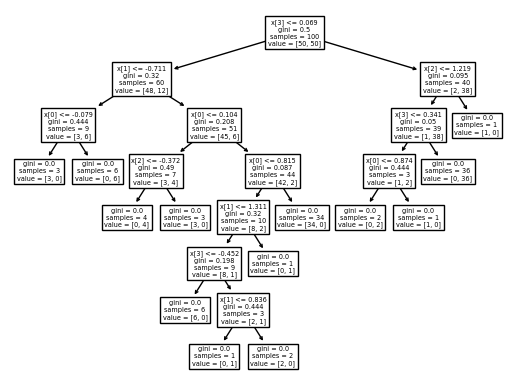

In [27]:
plot_tree(clf6)

In [28]:
print(df4.columns)
print(df5.columns)
print(df6.columns)

Index(['col4', 'col5', 'col2', 'col3', 'target'], dtype='object')
Index(['col2', 'col1', 'col3', 'col5', 'target'], dtype='object')
Index(['col5', 'col1', 'col3', 'col2', 'target'], dtype='object')


In [29]:
clf4.predict(np.array([-0.040936,-2.450951,0.691295,0.539018]).reshape(1,4))

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [30]:
clf5.predict(np.array([-0.040936,-2.450951,0.691295,0.539018]).reshape(1,4))

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [31]:
clf6.predict(np.array([-0.040936,-2.450951,0.691295,0.539018]).reshape(1,4))

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [32]:
combined_sampling(df,0.5,0.5)

,col3,col4,target
20,-0.732730,-0.176445,0
81,-4.711524,0.160817,0
89,-1.069260,-1.448391,1
69,0.141294,0.162922,0
12,-1.096330,-0.818382,1
10,-1.023274,-2.163240,1
82,-1.524704,-2.155732,1
93,-0.078315,-2.355399,1
23,-1.362598,0.689445,1
77,-0.140594,-2.684458,1


In [33]:
df7 = combined_sampling(df,0.5,0.5)
df8 = combined_sampling(df,0.5,0.5)
df9 = combined_sampling(df,0.5,0.5)

In [34]:
clf7 = DecisionTreeClassifier()
clf8 = DecisionTreeClassifier()
clf9 = DecisionTreeClassifier()

In [35]:
clf7.fit(df7.iloc[:,0:2],df7.iloc[:,-1])
clf8.fit(df8.iloc[:,0:2],df8.iloc[:,-1])
clf9.fit(df9.iloc[:,0:2],df9.iloc[:,-1])

DecisionTreeClassifier()

[Text(0.16666666666666666, 0.95, 'x[0] <= -0.313\ngini = 0.487\nsamples = 50\nvalue = [21, 29]'),
 Text(0.08333333333333333, 0.85, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.25, 0.85, 'x[0] <= 0.297\ngini = 0.449\nsamples = 44\nvalue = [15, 29]'),
 Text(0.16666666666666666, 0.75, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(0.3333333333333333, 0.75, 'x[1] <= -2.086\ngini = 0.49\nsamples = 35\nvalue = [15, 20]'),
 Text(0.16666666666666666, 0.65, 'x[0] <= 1.116\ngini = 0.153\nsamples = 12\nvalue = [1, 11]'),
 Text(0.08333333333333333, 0.55, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.25, 0.55, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(0.5, 0.65, 'x[1] <= -1.303\ngini = 0.476\nsamples = 23\nvalue = [14, 9]'),
 Text(0.4166666666666667, 0.55, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.5833333333333334, 0.55, 'x[0] <= 0.82\ngini = 0.498\nsamples = 17\nvalue = [8, 9]'),
 Text(0.4166666666666667, 0.45, 'x[1] <= -0.039\ngini = 0.32\nsamples = 10\nvalue =

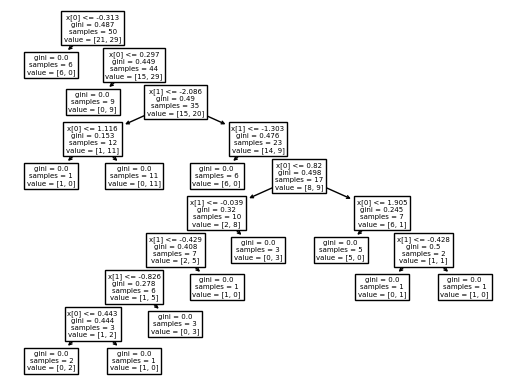

In [36]:
plot_tree(clf7)

[Text(0.6323529411764706, 0.9285714285714286, 'x[0] <= 0.407\ngini = 0.493\nsamples = 50\nvalue = [28, 22]'),
 Text(0.4411764705882353, 0.7857142857142857, 'x[1] <= 0.805\ngini = 0.36\nsamples = 34\nvalue = [26, 8]'),
 Text(0.23529411764705882, 0.6428571428571429, 'x[0] <= -0.54\ngini = 0.465\nsamples = 19\nvalue = [12, 7]'),
 Text(0.11764705882352941, 0.5, 'x[1] <= -1.68\ngini = 0.355\nsamples = 13\nvalue = [10, 3]'),
 Text(0.058823529411764705, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.17647058823529413, 0.35714285714285715, 'x[1] <= 0.486\ngini = 0.278\nsamples = 12\nvalue = [10, 2]'),
 Text(0.11764705882352941, 0.21428571428571427, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.23529411764705882, 0.21428571428571427, 'x[1] <= 0.582\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.17647058823529413, 0.07142857142857142, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.29411764705882354, 0.07142857142857142, 'gini = 0.0\nsamples = 2\nvalue = 

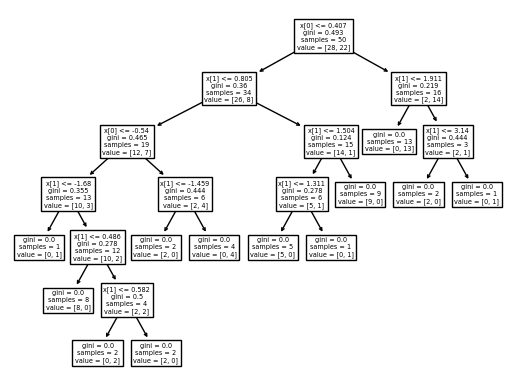

In [37]:
plot_tree(clf8)

[Text(0.5, 0.9375, 'x[0] <= -2.898\ngini = 0.487\nsamples = 50\nvalue = [21, 29]'),
 Text(0.4375, 0.8125, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.5625, 0.8125, 'x[0] <= 0.428\ngini = 0.458\nsamples = 45\nvalue = [16, 29]'),
 Text(0.5, 0.6875, 'x[1] <= -0.824\ngini = 0.414\nsamples = 41\nvalue = [12, 29]'),
 Text(0.25, 0.5625, 'x[1] <= -1.599\ngini = 0.5\nsamples = 16\nvalue = [8, 8]'),
 Text(0.125, 0.4375, 'x[1] <= -2.947\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.0625, 0.3125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.1875, 0.3125, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.375, 0.4375, 'x[0] <= -0.173\ngini = 0.346\nsamples = 9\nvalue = [7, 2]'),
 Text(0.3125, 0.3125, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.4375, 0.3125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.75, 0.5625, 'x[1] <= 1.712\ngini = 0.269\nsamples = 25\nvalue = [4, 21]'),
 Text(0.6875, 0.4375, 'x[0] <= -1.683\ngini = 0.219\nsamples = 24\nvalue = [3, 21]'),


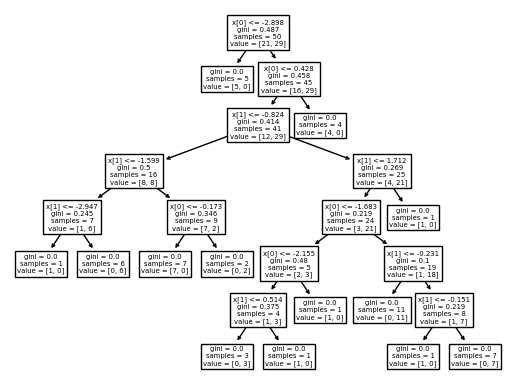

In [38]:
plot_tree(clf9)

In [39]:
clf7.predict(np.array([0.485928,2.277397]).reshape(1,2))

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [40]:
clf8.predict(np.array([0.485928,2.277397]).reshape(1,2))

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [41]:
clf9.predict(np.array([0.485928,2.277397]).reshape(1,2))

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])